<a href="https://colab.research.google.com/github/jaque-nicolau/InteligenciaArticial/blob/develop/Simulated_Aneeling_Problema_da_Mochila_0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

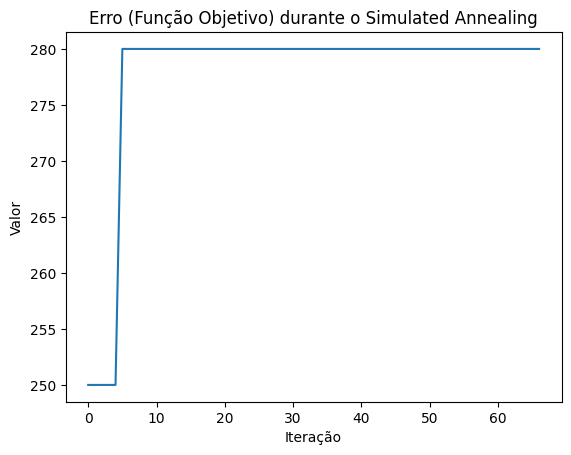

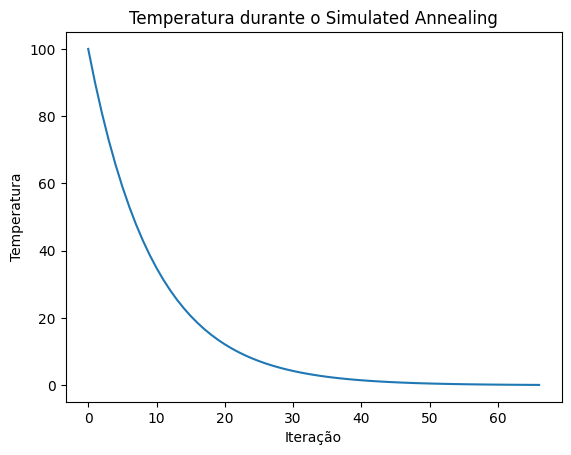

Melhor solução encontrada:
Itens na mochila:
 - Canivete Suíço
 - Barraca de Camping
 - Saco de Dormir
Valor total da mochila: 280


In [34]:
import random
import math
import matplotlib.pyplot as plt

# Definindo os itens disponíveis
itens = [
    {"nome": "Canivete Suíço", "peso": 0.2, "valor": 50},
    {"nome": "Barraca de Camping", "peso": 3.5, "valor": 150},
    {"nome": "Saco de Dormir", "peso": 1.2, "valor": 80},
    {"nome": "Garrafa Térmica", "peso": 0.6, "valor": 30},
    {"nome": "Lanterna", "peso": 0.3, "valor": 20}
]

# Função para inicializar a mochila
def inicializar_mochila(capacidade_maxima):
    mochila = []
    for item in itens:
        if random.random() < 0.5 and item["peso"] <= capacidade_maxima:
            mochila.append(item)
            capacidade_maxima -= item["peso"]
    return mochila

# Função de avaliação
def calcular_valor(solucao):
    valor_total = 0
    for item in solucao:
        valor_total += item["valor"]
    return valor_total

# Função para verificar o peso da mochila
def verificar_peso(solucao, capacidade_maxima):
    peso_total = 0
    for item in solucao:
        peso_total += item["peso"]
    return peso_total <= capacidade_maxima

# Parâmetros do Simulated Annealing
temperatura_inicial = 100.0
temperatura_final = 0.1
taxa_resfriamento = 0.9

# Inicialização
capacidade_maxima = 5.0
solucao_atual = inicializar_mochila(capacidade_maxima)
valor_atual = calcular_valor(solucao_atual)
peso_atual = verificar_peso(solucao_atual, capacidade_maxima)

melhor_solucao = solucao_atual.copy()
melhor_valor = valor_atual

# Listas para armazenar os valores para os gráficos
valores_melhor_solucao = [melhor_valor]
temperaturas = [temperatura_inicial]

# Laço principal do Simulated Annealing
temperatura_atual = temperatura_inicial

while temperatura_atual > temperatura_final:
    nova_solucao = inicializar_mochila(capacidade_maxima)
    valor_novo = calcular_valor(nova_solucao)
    diferenca_valor = valor_novo - valor_atual
    
    if diferenca_valor > 0 and verificar_peso(nova_solucao, capacidade_maxima):
        solucao_atual = nova_solucao
        valor_atual = valor_novo
        
        if valor_atual > melhor_valor:
            melhor_solucao = solucao_atual.copy()
            melhor_valor = valor_atual
    else:
        probabilidade = math.exp(diferenca_valor / temperatura_atual)
        if random.random() < probabilidade:
            solucao_atual = nova_solucao
    
    temperatura_atual *= taxa_resfriamento
    
    # Armazenar os valores para os gráficos
    valores_melhor_solucao.append(melhor_valor)
    temperaturas.append(temperatura_atual)

# Plotar o gráfico de erro (função objetivo)
plt.plot(valores_melhor_solucao)
plt.title("Erro (Função Objetivo) durante o Simulated Annealing")
plt.xlabel("Iteração")
plt.ylabel("Valor")
plt.show()

# Plotar o gráfico de temperatura
plt.plot(temperaturas)
plt.title("Temperatura durante o Simulated Annealing")
plt.xlabel("Iteração")
plt.ylabel("Temperatura")
plt.show()

# Imprimir a melhor solução encontrada
print("Melhor solução encontrada:")
print("Itens na mochila:")
for item in melhor_solucao:
    print(f" - {item['nome']}")
print(f"Valor total da mochila: {melhor_valor}")


##Relatório

Passo 1: Definir itens disponíveis
Foram definidos cinco itens disponíveis para a mochila, cada um com um peso e um valor associado. Os itens foram armazenados em uma lista chamada "itens".

Passo 2: Inicialização
Uma solução inicial aleatória foi gerada, respeitando os critérios do problema, ou seja, garantindo que a capacidade máxima da mochila não seja excedida. A função "inicializar_mochila" foi implementada para criar a solução inicial aleatória. Ela itera sobre os itens disponíveis, selecionando alguns aleatoriamente para adicionar à mochila, desde que o peso do item não exceda a capacidade máxima.

Passo 3: Função de avaliação
Duas funções foram implementadas para avaliar a solução da mochila. A função "calcular_valor" calcula o valor total da mochila com base nos itens selecionados. A função "verificar_peso" verifica se o peso total dos itens selecionados não excede a capacidade máxima da mochila.

Passo 4: Laço principal do Simulated Annealing
O algoritmo Simulated Annealing é executado no laço principal para encontrar uma solução ótima ou aproximadamente ótima para o problema da mochila. A temperatura inicial, a temperatura final e a taxa de resfriamento são definidas no início do código.

Dentro do laço principal, uma nova solução vizinha é gerada fazendo uma pequena alteração na solução atual. A diferença de valor entre a nova solução vizinha e a solução atual é calculada. Se a nova solução vizinha for melhor (ou seja, tiver um valor maior) e estiver dentro da capacidade máxima da mochila, a nova solução é aceita como a solução atual. Caso contrário, a nova solução vizinha é aceita com uma probabilidade dependente da diferença de valor e da temperatura atual. Isso permite que o algoritmo escape de mínimos locais.

O laço principal é repetido até que a temperatura atual atinja a temperatura final.

Passo 5: Retornar a melhor solução encontrada
Após o laço principal do Simulated Annealing, a melhor solução encontrada é armazenada na variável "melhor_solucao". Essa solução é exibida no final do código, mostrando os itens selecionados para a mochila e o valor total da mochila.

Gráfico de Erro (Função Objetivo)
O primeiro gráfico gerado é o gráfico de erro, que representa a função objetivo ao longo das iterações do algoritmo. Ele mostra como o valor da função objetivo (nesse caso, o valor total da mochila) evolui à medida que o algoritmo avança. Cada ponto no gráfico representa o valor da melhor solução encontrada até aquele momento.

Gráfico de Temperatura
O segundo gráfico gerado é o gráfico de temperatura, que mostra a temperatura ao longo das iterações do algoritmo. Ele ilustra como a temperatura diminui à medida que o algoritmo avança. Cada ponto no gráfico representa o valor da temperatura atual.

O gráfico de erro permite observar se o algoritmo está convergindo para uma solução ótima ou se está preso em um mínimo local. Já o gráfico de temperatura mostra como a temperatura influencia a aceitação de soluções piores, permitindo o escape de mínimos locais.